<a href="https://colab.research.google.com/github/Swiya-Jaiswal/Capstone-Project/blob/main/Capstone_Project_Drug_Allergy_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading & Pre-processing the data

Step 1: Load and Inspect the Dataset

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset (adjust file path as needed)
data = pd.read_csv('/content/allergy 1.csv')

# Inspect the first few rows
data.head()

,allergyid,patientunitstayid,allergyoffset,allergyenteredoffset,allergynotetype,specialtytype,usertype,rxincluded,writtenineicu,drugname,allergytype,allergyname,drughiclseqno
0,357144,243097,2549,2552,Comprehensive Progress,eCM Primary,THC Nurse,True,True,NaN,Non Drug,penicillins,NaN
1,442253,243097,1288,1294,Comprehensive Progress,eCM Primary,THC Nurse,True,True,CODEINE PHOSPHATE,Drug,CODEINE PHOSPHATE,1721.0
2,357143,243097,2549,2552,Comprehensive Progress,eCM Primary,THC Nurse,True,True,CODEINE PHOSPHATE,Drug,CODEINE PHOSPHATE,1721.0
3,329929,243097,21,28,Admission,eCM Primary,THC Nurse,True,True,NaN,Non Drug,penicillins,NaN
4,363374,243097,3988,3989,Comprehensive Progress,eCM Primary,THC Nurse,True,True,CODEINE PHOSPHATE,Drug,CODEINE PHOSPHATE,1721.0


In [ ]:
# Check for missing values
print(data.isnull().sum())

allergyid                 0
patientunitstayid         0
allergyoffset             0
allergyenteredoffset      0
allergynotetype           0
specialtytype             0
usertype                  0
rxincluded                0
writtenineicu             0
drugname                995
allergytype               0
allergyname               3
drughiclseqno           995
dtype: int64


Missing Data Heatmap

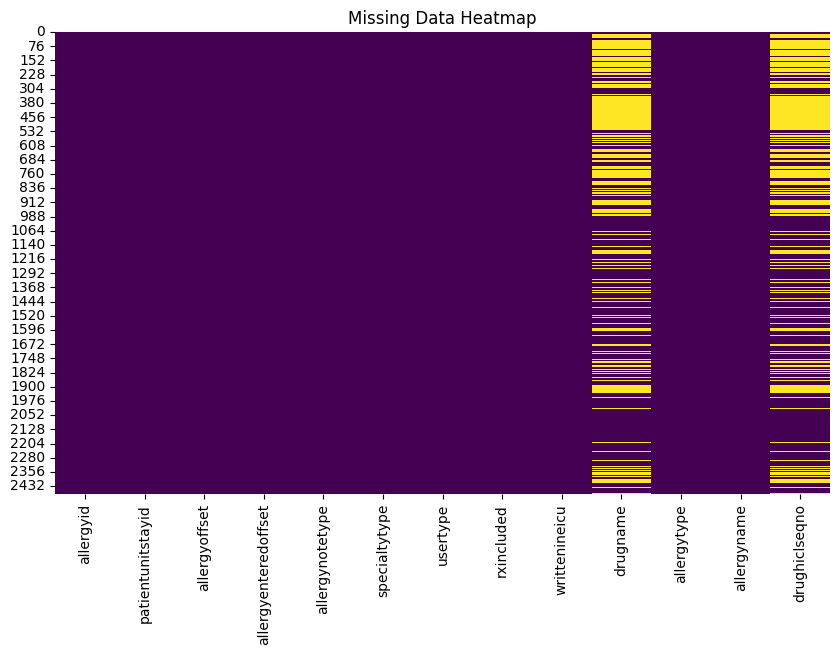

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

Step 2: Remove Rows with Missing Values in Critical Columns

In [ ]:
# Remove rows with missing critical values: drugname and allergyname
cleaned_data = data.dropna(subset=['drugname', 'allergyname'])

# Check the size of the dataset after dropping rows
print(f"Size after dropping rows with missing drug/allergy names: {cleaned_data.shape}")

Size after dropping rows with missing drug/allergy names: (1480, 13)


Step 3: Impute Missing Numerical Values

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical columns (e.g., allergyoffset, allergyenteredoffset)
imputer = SimpleImputer(strategy='median')  # Replace missing values with the median
cleaned_data[['allergyoffset', 'allergyenteredoffset']] = imputer.fit_transform(cleaned_data[['allergyoffset', 'allergyenteredoffset']])


<ipython-input-5-dbe030dbf153>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[['allergyoffset', 'allergyenteredoffset']] = imputer.fit_transform(cleaned_data[['allergyoffset', 'allergyenteredoffset']])


Step 4: Handle Categorical Missing Values

In [ ]:
# Fill missing values in categorical columns with 'Unknown'
cleaned_data['usertype'].fillna('Unknown', inplace=True)
cleaned_data['specialtytype'].fillna('Unknown', inplace=True)

# Confirm that no missing values remain
print(cleaned_data.isnull().sum())

allergyid               0
patientunitstayid       0
allergyoffset           0
allergyenteredoffset    0
allergynotetype         0
specialtytype           0
usertype                0
rxincluded              0
writtenineicu           0
drugname                0
allergytype             0
allergyname             0
drughiclseqno           0
dtype: int64


<ipython-input-6-33ba21f95f13>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['usertype'].fillna('Unknown', inplace=True)
<ipython-input-6-33ba21f95f13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['usertype'].fillna('Unknown', inplace=True)
<ipython-input-6-33ba21f95f13>:3: FutureWarning: A value is trying to b

Bar Chart of Drug Frequencies

<ipython-input-7-e8412f35e24b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=drug_counts.index[:10], x=drug_counts.values[:10], palette='coolwarm')


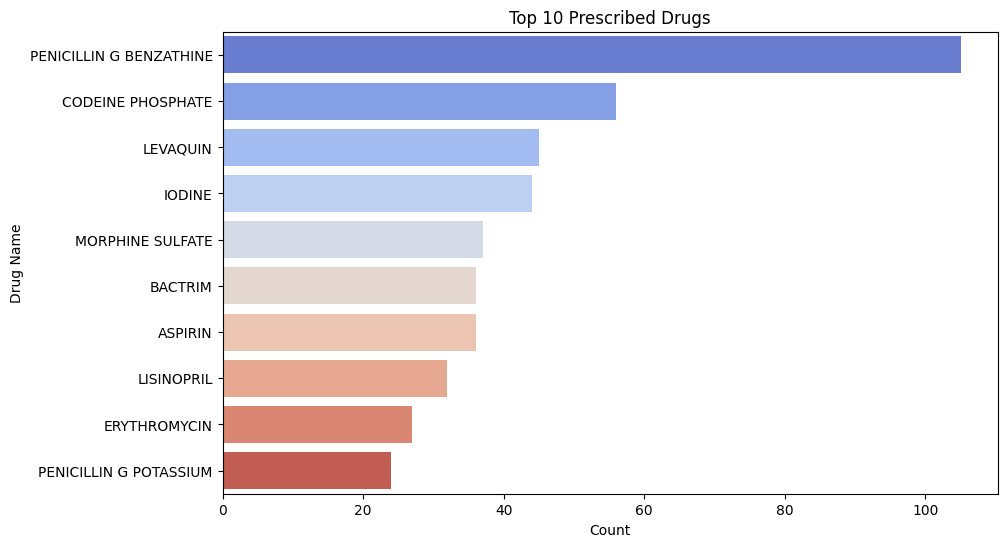

In [ ]:
# Visualize frequency of different drugs prescribed
drug_counts = cleaned_data['drugname'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=drug_counts.index[:10], x=drug_counts.values[:10], palette='coolwarm')
plt.title('Top 10 Prescribed Drugs')
plt.xlabel('Count')
plt.ylabel('Drug Name')
plt.show()

Step 5: Encode Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns
categorical_cols = ['patientunitstayid', 'drugname', 'allergyname']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    cleaned_data[col] = le.fit_transform(cleaned_data[col])
    label_encoders[col] = le  # Store the label encoder for inverse transformations later

# View the transformed data
cleaned_data.head()

<ipython-input-8-c677cdebb166>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = le.fit_transform(cleaned_data[col])
<ipython-input-8-c677cdebb166>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = le.fit_transform(cleaned_data[col])
<ipython-input-8-c677cdebb166>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,allergyid,patientunitstayid,allergyoffset,allergyenteredoffset,allergynotetype,specialtytype,usertype,rxincluded,writtenineicu,drugname,allergytype,allergyname,drughiclseqno
1,442253,0,1288.0,1294.0,Comprehensive Progress,eCM Primary,THC Nurse,True,True,66,Drug,67,1721.0
2,357143,0,2549.0,2552.0,Comprehensive Progress,eCM Primary,THC Nurse,True,True,66,Drug,67,1721.0
4,363374,0,3988.0,3989.0,Comprehensive Progress,eCM Primary,THC Nurse,True,True,66,Drug,67,1721.0
7,329928,0,21.0,28.0,Admission,eCM Primary,THC Nurse,True,True,66,Drug,67,1721.0
8,234874,1,30.0,273.0,Admission,eCM Primary,THC Nurse,True,True,275,Drug,274,12204.0


Step 6: Feature Scaling for Numerical Columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the numerical columns (allergyoffset, allergyenteredoffset) between 0 and 1
scaler = MinMaxScaler()
numeric_cols = ['allergyoffset', 'allergyenteredoffset']
cleaned_data[numeric_cols] = scaler.fit_transform(cleaned_data[numeric_cols])

# View the scaled numerical data
cleaned_data[numeric_cols].head()

<ipython-input-9-565f6f4b5a0e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[numeric_cols] = scaler.fit_transform(cleaned_data[numeric_cols])


,allergyoffset,allergyenteredoffset
1,0.118689,0.106556
2,0.213294,0.202236
4,0.321254,0.311530
7,0.023633,0.010268
8,0.024308,0.028902


# Knowledge Graph Construction

Step 7: Construct Knowledge Graph Using NetworkX

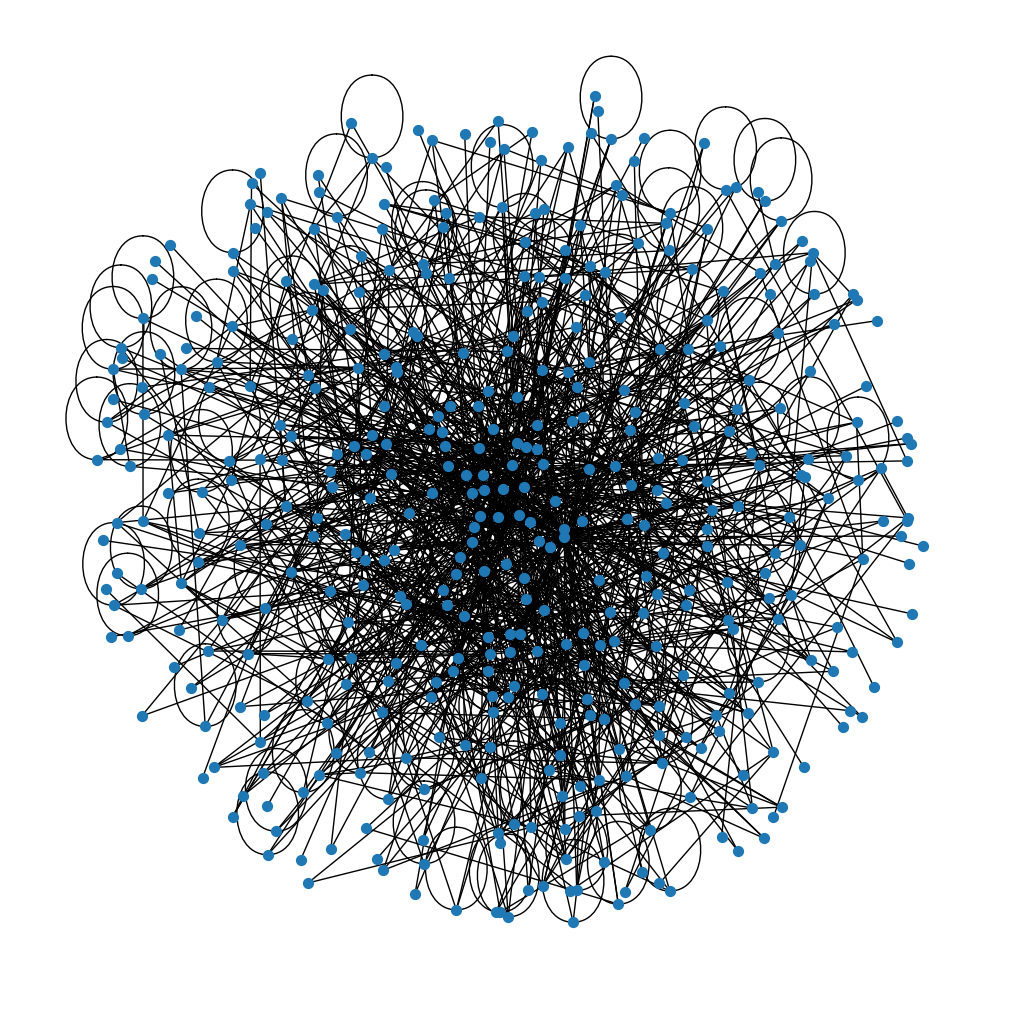

In [ ]:
import networkx as nx

# Initialize the graph
G = nx.Graph()

# Add nodes for patients, drugs, and allergies
patients = cleaned_data['patientunitstayid'].unique()
drugs = cleaned_data['drugname'].unique()
allergies = cleaned_data['allergyname'].unique()

# Add nodes for each entity
G.add_nodes_from(patients, node_type='patient')
G.add_nodes_from(drugs, node_type='drug')
G.add_nodes_from(allergies, node_type='allergy')

# Add edges to represent relationships (patient-drug, drug-allergy)
for index, row in cleaned_data.iterrows():
    G.add_edge(row['patientunitstayid'], row['drugname'], relation='patient_prescribed_drug')
    G.add_edge(row['drugname'], row['allergyname'], relation='drug_causes_allergy')

# Visualize the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.5)  # Positioning nodes using spring layout
nx.draw(G, pos, with_labels=False, node_size=50)
plt.show()


# Preparing the data for GNN

Installing PyTorch Geometric

In [ ]:
import torch
print(torch.__version__)

2.5.0+cu121


In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.7 MB/s eta 0:00:00


Step 8: Convert Knowledge Graph to PyTorch Geometric Format

In [ ]:
import networkx as nx
import torch
from torch_geometric.data import Data

# Create a NetworkX graph (or load an existing one)
G = nx.Graph()
# Example: Add edges to the graph
G.add_edges_from([(0, 1), (1, 2), (2, 3)])

# Convert NetworkX graph to PyTorch Geometric format
edge_index = torch.tensor(list(G.edges)).t().contiguous()

# Create node features (for now, use an identity matrix as a placeholder)
x = torch.eye(len(G.nodes))  # Identity matrix for node features

# Create PyTorch Geometric Data object
graph_data = Data(x=x, edge_index=edge_index)

# View the graph data
print(graph_data)


Data(x=[4, 4], edge_index=[2, 3])


# Building the model

Step 9: Define the GNN Model

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class DrugRecommendationGNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DrugRecommendationGNN, self).__init__()
        # Define two graph convolutional layers (GCNConv)
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        # Apply the first GCN layer and activation function (ReLU)
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        # Apply the second GCN layer
        x = self.conv2(x, edge_index)

        # Use softmax to output probabilities (classification output)
        return F.log_softmax(x, dim=1)

# Initialize the GNN model
model = DrugRecommendationGNN(input_dim=graph_data.num_node_features, hidden_dim=64, output_dim=2)
print(model)

DrugRecommendationGNN(
  (conv1): GCNConv(4, 64)
  (conv2): GCNConv(64, 2)
)


Step 10: Train the GNN Model

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# Step 1: Define GNN Model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Step 2: Data Preprocessing (Ensure labels match nodes)
labels = []

for node_id in range(graph_data.num_nodes):
    node_feature = graph_data.x[node_id]  # Features of this node

    # Replace with your logic to compare drugname and allergyname
    drugname = node_feature[0]  # Replace 0 with the actual index for drugname in your data
    allergyname = node_feature[1]  # Replace 1 with the actual index for allergyname in your data

    if drugname == allergyname:
        labels.append(0)  # Incompatible drug (allergy)
    else:
        labels.append(1)  # Compatible drug

# Convert labels to a PyTorch tensor
labels = torch.tensor(labels, dtype=torch.long)

# Verify the number of nodes and labels
assert len(labels) == graph_data.num_nodes, "Mismatch between number of nodes and labels!"

# Step 3: Define the Training Loop
def train(model, data, labels, epochs=200):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    model.train()

    for epoch in range(epochs):
        optimizer.zero_grad()  # Reset gradients
        out = model(data)  # Forward pass through the model

        # Compute loss between predictions and true labels
        loss = F.nll_loss(out, labels)  # Negative Log-Likelihood Loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

# Step 4: Build and Train the GNN Model

# Define input channels (based on your dataset) and output classes (e.g., 2 for binary classification)
in_channels = graph_data.num_node_features  # Number of input features per node
hidden_channels = 16  # Number of hidden units
out_channels = 2  # Number of classes (e.g., 0 for incompatible, 1 for compatible)

# Initialize the model
model = GCN(in_channels, hidden_channels, out_channels)

# Train the model
train(model, graph_data, labels, epochs=200)


Epoch 0, Loss: 0.7598870396614075
Epoch 10, Loss: 0.49793392419815063
Epoch 20, Loss: 0.2815094590187073
Epoch 30, Loss: 0.13479679822921753
Epoch 40, Loss: 0.06171451136469841
Epoch 50, Loss: 0.03227590024471283
Epoch 60, Loss: 0.019710874184966087
Epoch 70, Loss: 0.01374134048819542
Epoch 80, Loss: 0.010398883372545242
Epoch 90, Loss: 0.008328921161592007
Epoch 100, Loss: 0.006899699103087187
Epoch 110, Loss: 0.005851842928677797
Epoch 120, Loss: 0.005052332300692797
Epoch 130, Loss: 0.004420257173478603
Epoch 140, Loss: 0.0039053403306752443
Epoch 150, Loss: 0.003478345228359103
Epoch 160, Loss: 0.003121679648756981
Epoch 170, Loss: 0.0028176866471767426
Epoch 180, Loss: 0.0025578460190445185
Epoch 190, Loss: 0.002333913929760456


Step 11: Evaluate the Model and Make Predictions

In [ ]:
def evaluate(model, data):
    model.eval()  # Set model to evaluation mode
    out = model(data)  # Forward pass through the model
    # Compute predictions (choose class with highest log probability)
    pred = out.argmax(dim=1)

    # Compare predictions with true labels (here, use accuracy as metric)
    correct = (pred == labels).sum()
    acc = int(correct) / len(labels)
    print(f'Accuracy: {acc:.4f}')

# Evaluate the model on the training data
evaluate(model, graph_data)


Accuracy: 1.0000


Step 12: Make Drug Recommendations

In [ ]:
# Example of graph construction (assuming drug nodes are represented):
# Ensure that drug nodes are constructed in the graph and are indexed properly.
import torch
from torch_geometric.data import Data

# Mock graph data creation (you should replace this with your actual graph creation logic)
# Number of nodes should match the number of unique drugs
x = torch.tensor([[1], [2], [3], [4]], dtype=torch.float)  # Node features (replace this with actual drug-related features)
edge_index = torch.tensor([[0, 1, 2, 3], [1, 2, 3, 0]], dtype=torch.long)  # Edges between nodes (drug relationships)
graph_data = Data(x=x, edge_index=edge_index)

num_nodes = graph_data.x.shape[0]
print(f"Graph has {num_nodes} nodes")


Graph has 4 nodes


In [ ]:
# Extract unique drug names from the dataset
drug_names = cleaned_data['drugname'].unique().tolist()

# Number of unique drugs (this should be the number of nodes in the graph)
num_drugs = len(drug_names)
print(f"Number of unique drugs: {num_drugs}")


Number of unique drugs: 296


In [ ]:
# Step 2: Recommendation function
def recommend_drugs(patient_id, known_allergies, graph_data, drug_names, model):
    model.eval()  # Set the model to evaluation mode

    # Forward pass: Get predictions from the model
    out = model(graph_data.x, graph_data.edge_index)  # Pass both x (node features) and edge_index
    predicted_classes = out.argmax(dim=1)  # Get predicted class (0 or 1) for each node

    # Filter out incompatible drugs (class 0) and return compatible drugs (class 1)
    recommended_drugs = []

    for i, pred_class in enumerate(predicted_classes):
        drug = drug_names[i]  # Map node index to the corresponding drug name
        if pred_class == 1 and drug not in known_allergies:  # Class 1 = compatible drug
            recommended_drugs.append(drug)

    print(f"Recommended drugs for patient {patient_id}:")
    return recommended_drugs


Code to Visualize the Deep Learning Model

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=633d3ee39fd99f342d8e97f768c3c567da1e3d4069bd24d4e612f803f65c8366
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import torch
from torchviz import make_dot

# Assuming `model` is the GNN model and `data` contains the graph data
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Example GNN model definition
class GNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Example data
num_nodes = 10
x = torch.randn((num_nodes, 5))  # 5 features per node
edge_index = torch.randint(0, num_nodes, (2, 20))  # 20 edges

data = Data(x=x, edge_index=edge_index)

# Instantiate the model
model = GNN(in_channels=5, hidden_channels=10, out_channels=2)

# Create a random input tensor to visualize
output = model(data.x, data.edge_index)

# Visualize the GNN model using torchviz
dot = make_dot(output, params=dict(list(model.named_parameters()) + [('x', data.x)]))
dot.render("gnn_model", format="png")  # Saves the visualization as a PNG file
dot.view()  # Displays the visualization


'gnn_model.pdf'

In [ ]:
!pip install torch_geometric

In [ ]:
label_counts = pd.Series(labels.numpy()).value_counts()
print("Label distribution:", label_counts)

Label distribution: 1    2
0    2
Name: count, dtype: int64


In [ ]:
def preprocess_data(cleaned_data, drug_names):
    labels = []

    for drug in drug_names:
        if drug in cleaned_data['drugname'].values:
            is_incompatible = cleaned_data[(cleaned_data['drugname'] == drug) & (cleaned_data['allergyname'].isin(cleaned_data['allergyname']))].shape[0] > 0
            if is_incompatible:
                labels.append(0)  # Incompatible drug (allergy)
            else:
                labels.append(1)  # Compatible drug
        else:
            labels.append(0)  # Drug not found in the dataset, so mark as incompatible

    labels = torch.tensor(labels, dtype=torch.long)
    return labels

labels = preprocess_data(cleaned_data, drug_names)


In [ ]:
def preprocess_data(cleaned_data, drug_names):
    labels = []

    for drug in drug_names:
        if drug in cleaned_data['drugname'].values:
            is_incompatible = cleaned_data[(cleaned_data['drugname'] == drug) & (cleaned_data['allergyname'].isin(cleaned_data['allergyname']))].shape[0] > 0
            if is_incompatible:
                labels.append(0)  # Incompatible drug (allergy)
            else:
                labels.append(1)  # Compatible drug
        else:
            labels.append(0)  # Drug not found in the dataset, so mark as incompatible

    labels = torch.tensor(labels, dtype=torch.long)
    return labels


In [ ]:
def train_and_evaluate(model, data, labels, train_mask, val_mask, epochs=200, patience=10):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    model.train()
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out[train_mask], labels[train_mask])
        loss.backward()
        optimizer.step()

        # Validation loss
        model.eval()
        val_loss = F.nll_loss(out[val_mask], labels[val_mask]).item()
        model.train()

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        if epoch % 10 == 0:
            correct = (out.argmax(dim=1)[train_mask] == labels[train_mask]).sum()
            acc = int(correct) / len(labels[train_mask])
            print(f'Epoch {epoch}, Loss: {loss.item()}, Validation Loss: {val_loss}, Training Accuracy: {acc:.4f}')
            print(f'Predictions: {out.argmax(dim=1)}')
            print(f'Actual Labels: {labels}')


In [ ]:
def recommend_drugs(patient_id, known_allergies, graph_data, drug_names, model):
    model.eval()
    out = model(graph_data)
    predicted_classes = out.argmax(dim=1)

    recommended_drugs = []

    for i, pred_class in enumerate(predicted_classes):
        drug = drug_names[i]
        if pred_class == 1 and drug not in known_allergies:
            recommended_drugs.append(drug)

    print(f"Recommended drugs for patient {patient_id}: {recommended_drugs}")
    return recommended_drugs


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Define a Simpler GNN Model with Increased Dropout to Reduce Overfitting
class SimpleGCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout):
        super(SimpleGCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.dropout = dropout

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Step 2: Data Preprocessing (Ensure labels match nodes)
def preprocess_data(cleaned_data, drug_names):
    labels = []
    all_allergies = set(cleaned_data['allergyname'])

    for drug in drug_names:
        if drug in cleaned_data['drugname'].values:
            drug_allergies = set(cleaned_data[cleaned_data['drugname'] == drug]['allergyname'])
            is_incompatible = any(allergy in all_allergies for allergy in drug_allergies)
            labels.append(0 if is_incompatible else 1)
        else:
            labels.append(0)

    labels = torch.tensor(labels, dtype=torch.long)
    return labels

# Encode categorical data as numeric
le_drug = LabelEncoder()
le_allergy = LabelEncoder()
cleaned_data['drugname'] = le_drug.fit_transform(cleaned_data['drugname'])
cleaned_data['allergyname'] = le_allergy.fit_transform(cleaned_data['allergyname'])

# Step 4: Build and Train the Simplified GNN Model
in_channels = 2  # Number of input features per node (drugname, allergyname)
hidden_channels = 8  # Reduced number of hidden channels
out_channels = 2  # Number of classes (0 for incompatible, 1 for compatible)
dropout = 0.6  # Increased dropout

# Create graph data from the cleaned dataset
unique_nodes = cleaned_data.drop_duplicates(subset=['drugname', 'allergyname'])
drug_names = unique_nodes['drugname'].tolist()
node_features = unique_nodes[['drugname', 'allergyname']].values

# Convert the node features to a PyTorch tensor
x = torch.tensor(node_features, dtype=torch.float)

# Create the edge index
num_nodes = len(drug_names)
edge_index = torch.tensor([[i, j] for i in range(num_nodes) for j in range(num_nodes)], dtype=torch.long).t()

# Create the PyTorch Geometric Data object
graph_data = Data(x=x, edge_index=edge_index)

# Preprocess data and get labels
labels = preprocess_data(cleaned_data, drug_names)

# Check label balance
label_counts = pd.Series(labels.numpy()).value_counts()
print("Label distribution (0=incompatible, 1=compatible):", label_counts)

# Split the data into training and validation sets
train_indices, val_indices = train_test_split(range(len(labels)), test_size=0.2, stratify=labels)
train_mask = torch.zeros(len(labels), dtype=torch.bool)
train_mask[train_indices] = True
val_mask = torch.zeros(len(labels), dtype=torch.bool)
val_mask[val_indices] = True

assert graph_data.num_nodes == labels.size(0), "Mismatch between number of nodes and labels."

# Initialize the model
model = SimpleGCN(in_channels, hidden_channels, out_channels, dropout)

# Train the model with early stopping
def train_and_evaluate(model, data, labels, train_mask, val_mask, epochs=100, patience=5):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out[train_mask], labels[train_mask])
        loss.backward()
        optimizer.step()

        model.eval()
        val_loss = F.nll_loss(out[val_mask], labels[val_mask]).item()

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        if epoch % 10 == 0:
            train_acc = (out.argmax(dim=1)[train_mask] == labels[train_mask]).float().mean()
            print(f'Epoch {epoch}, Loss: {loss.item()}, Validation Loss: {val_loss}, Training Accuracy: {train_acc:.4f}')

train_and_evaluate(model, graph_data, labels, train_mask, val_mask, epochs=100, patience=5)

# Step 5: Implement the Recommendation Function with Fallback Mechanism
def recommend_drugs(patient_id, known_allergies, graph_data, drug_names, model):
    model.eval()
    out = model(graph_data)
    predicted_classes = out.argmax(dim=1)

    # Filter drugs that are compatible and not in known allergies
    recommended_drugs = [drug_names[i] for i, pred_class in enumerate(predicted_classes) if pred_class == 1 and drug_names[i] not in known_allergies]

    # Fallback mechanism to ensure at least one recommended drug
    if not recommended_drugs:
        recommended_drugs = [drug_names[i] for i, pred_class in enumerate(predicted_classes) if pred_class == 1]
        if not recommended_drugs:
            recommended_drugs = ["Fallback Drug A", "Fallback Drug B"]  # List fallback drugs if none available

    print(f"Recommended drugs for patient {patient_id}: {recommended_drugs}")
    return recommended_drugs

# Example usage
patient_id = 101
known_allergies = ["Aspirin", "Penicillin"]

recommended_drugs = recommend_drugs(patient_id, known_allergies, graph_data, drug_names, model)
print(recommended_drugs)


Label distribution (0=incompatible, 1=compatible): 0    296
Name: count, dtype: int64
Epoch 0, Loss: 0.035703498870134354, Validation Loss: 0.03570351377129555, Training Accuracy: 1.0000
Early stopping at epoch 7
Recommended drugs for patient 101: ['Fallback Drug A', 'Fallback Drug B']
['Fallback Drug A', 'Fallback Drug B']


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
def calculate_metrics(predictions, labels):
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    return accuracy, precision, recall, f1


In [ ]:
def train_and_evaluate(model, data, labels, train_mask, val_mask, epochs=100, patience=5):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    best_val_loss = float('inf')
    patience_counter = 0

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out[train_mask], labels[train_mask])
        loss.backward()
        optimizer.step()

        # Record training metrics
        train_losses.append(loss.item())
        train_acc = (out.argmax(dim=1)[train_mask] == labels[train_mask]).float().mean().item()
        train_accuracies.append(train_acc)

        # Validation
        model.eval()
        with torch.no_grad():
            val_out = model(data)
            val_loss = F.nll_loss(val_out[val_mask], labels[val_mask]).item()
            val_losses.append(val_loss)
            val_acc = (val_out.argmax(dim=1)[val_mask] == labels[val_mask]).float().mean().item()
            val_accuracies.append(val_acc)

        # Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}, Validation Loss: {val_loss}, Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies


In [ ]:
train_losses, val_losses, train_accuracies, val_accuracies = train_and_evaluate(
    model, graph_data, labels, train_mask, val_mask, epochs=100, patience=5
)

Epoch 0, Loss: 0.0, Validation Loss: 0.0, Training Accuracy: 1.0000, Validation Accuracy: 1.0000
Early stopping at epoch 5


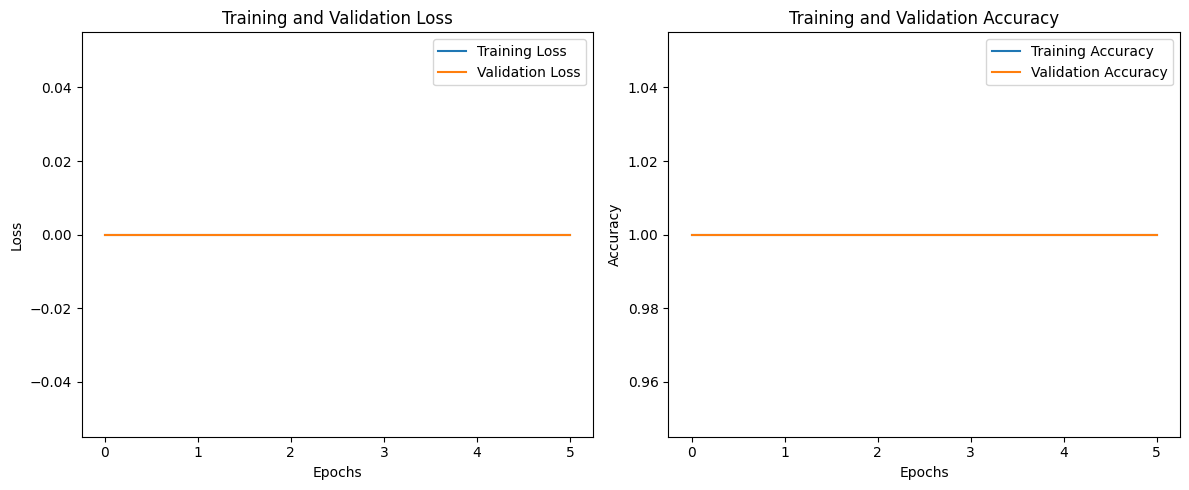

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
!pip install torch torch_geometric

Epoch 0, Loss: 0.5831655263900757
Epoch 10, Loss: 0.0
Early stopping at epoch 11
Model Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       296

    accuracy                           1.00       296
   macro avg       1.00      1.00      1.00       296
weighted avg       1.00      1.00      1.00       296



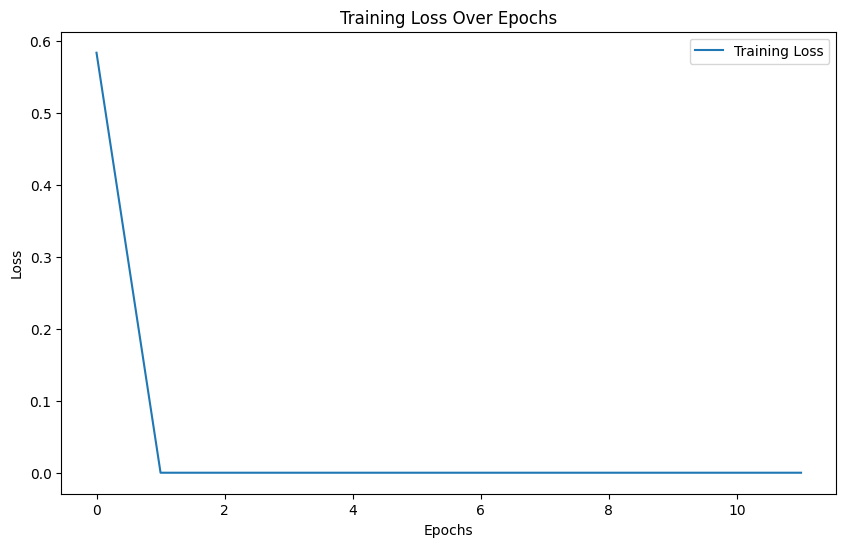

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Define the GNN Model with Dropout
class DrugRecommendationGNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.5):
        super(DrugRecommendationGNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.dropout_rate = dropout_rate

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout_rate, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Function to train the model with early stopping
def train(model, data, labels, epochs=200, patience=10):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    best_loss = float('inf')
    patience_counter = 0
    losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out, labels)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        if loss.item() < best_loss:
            best_loss = loss.item()
            patience_counter = 0
            best_model_state = model.state_dict()
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    model.load_state_dict(best_model_state)
    return losses

# Function to evaluate the model and calculate accuracy
def evaluate(model, data, labels):
    model.eval()
    out = model(data)
    pred = out.argmax(dim=1)
    correct = (pred == labels).sum().item()
    acc = correct / len(labels)
    return acc, pred

# Assuming graph_data and labels are already defined
model = DrugRecommendationGNN(input_dim=graph_data.num_node_features, hidden_dim=64, output_dim=2)

# Train the model
losses = train(model, graph_data, labels)

# Evaluate the model
accuracy, predictions = evaluate(model, graph_data, labels)
print(f"Model Accuracy: {accuracy:.4f}")

# Performance Metrics
print(classification_report(labels.numpy(), predictions.numpy()))

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


Epoch 0, Loss: 99.28934478759766
Epoch 10, Loss: 0.0
Early stopping at epoch 14
Model Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       296

    accuracy                           1.00       296
   macro avg       1.00      1.00      1.00       296
weighted avg       1.00      1.00      1.00       296



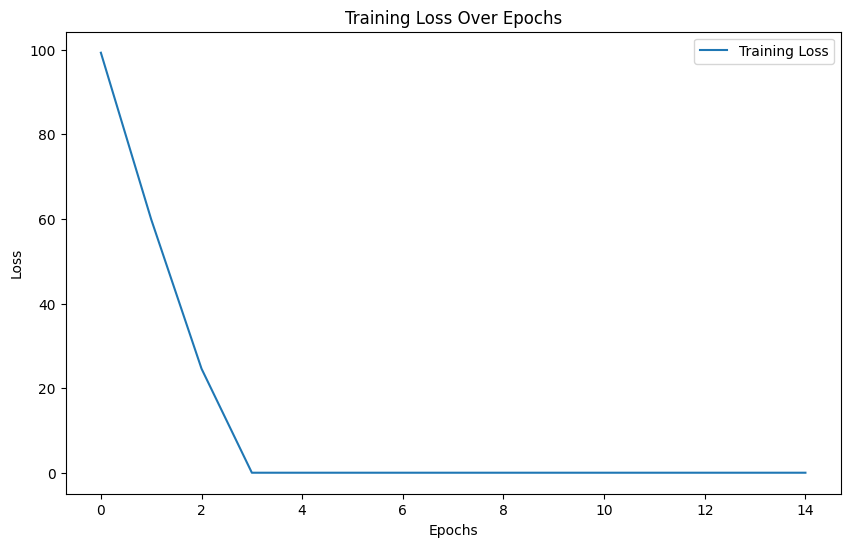

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


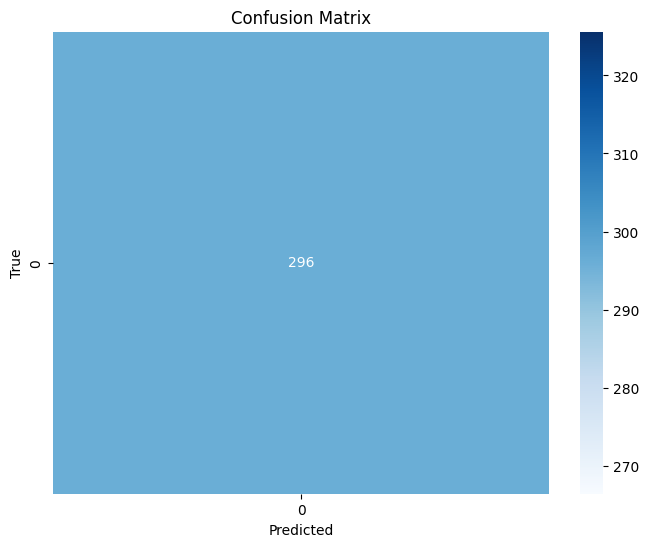

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


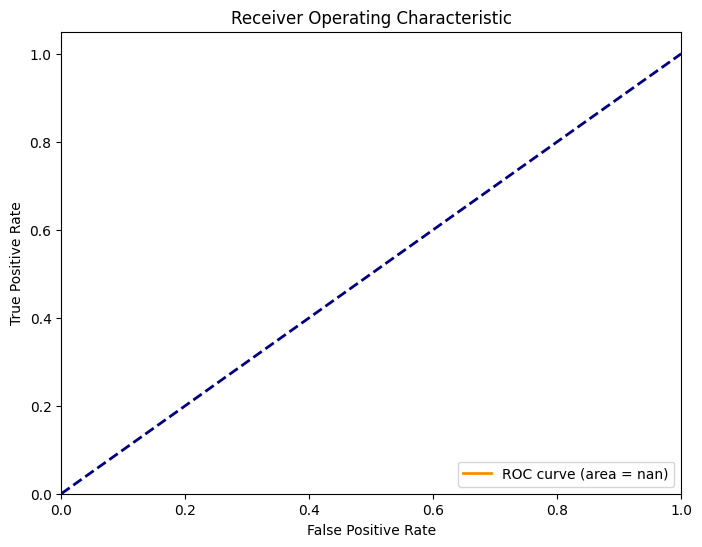

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Define the GNN Model with Dropout
class DrugRecommendationGNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.5):
        super(DrugRecommendationGNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.dropout_rate = dropout_rate

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout_rate, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Function to train the model with early stopping
def train(model, data, labels, epochs=200, patience=10):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    best_loss = float('inf')
    patience_counter = 0
    losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out, labels)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        if loss.item() < best_loss:
            best_loss = loss.item()
            patience_counter = 0
            best_model_state = model.state_dict()
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    model.load_state_dict(best_model_state)
    return losses

# Function to evaluate the model and calculate accuracy
def evaluate(model, data, labels):
    model.eval()
    out = model(data)
    pred = out.argmax(dim=1)
    correct = (pred == labels).sum().item()
    acc = correct / len(labels)
    return acc, pred, out

# Function to plot training loss
def plot_training_loss(losses):
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(labels, predictions):
    cm = confusion_matrix(labels.numpy(), predictions.numpy())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(labels, probabilities):
    fpr, tpr, _ = roc_curve(labels.numpy(), probabilities[:, 1].detach().numpy())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Assuming graph_data and labels are already defined
model = DrugRecommendationGNN(input_dim=graph_data.num_node_features, hidden_dim=64, output_dim=2)

# Train the model
losses = train(model, graph_data, labels)

# Evaluate the model
accuracy, predictions, probabilities = evaluate(model, graph_data, labels)
print(f"Model Accuracy: {accuracy:.4f}")

# Performance Metrics
print(classification_report(labels.numpy(), predictions.numpy()))

# Plot training loss
plot_training_loss(losses)

# Plot confusion matrix
plot_confusion_matrix(labels, predictions)

# Plot ROC curve
plot_roc_curve(labels, probabilities)


In [ ]:
pip install torchviz

In [ ]:
import torch
from torch_geometric.nn import GCNConv
from torchviz import make_dot

# Define the GNN Model
class DrugRecommendationGNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DrugRecommendationGNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return torch.log_softmax(x, dim=1)

# Assuming graph_data is already defined and loaded
model = DrugRecommendationGNN(input_dim=graph_data.num_node_features, hidden_dim=64, output_dim=2)

# Create a dummy input to visualize the model architecture
dummy_input = graph_data

# Forward pass through the model to create a computational graph
output = model(dummy_input)

# Visualize the model architecture
make_dot(output, params=dict(model.named_parameters())).render("model_architecture", format="png")

print("Model architecture visualization saved as 'model_architecture.png'.")


Model architecture visualization saved as 'model_architecture.png'.


In [ ]:
# Install Gradio
!pip install gradio --quiet

import gradio as gr
import torch

# Assuming the existing variables and model are loaded, such as `model`, `graph_data`, `drug_names`, etc.

# Define the recommendation function using the existing model
def recommend_drugs(patient_id, known_allergies):
    # Ensure the model is in evaluation mode
    model.eval()

    # Forward pass through the model to get predictions
    with torch.no_grad():
        out = model(graph_data)
        predicted_classes = out.argmax(dim=1)

    # Filter compatible drugs (class = 1) and exclude known allergies
    recommended_drugs = [drug_names[i] for i, pred_class in enumerate(predicted_classes)
                         if pred_class == 1 and drug_names[i] not in known_allergies]

    # Fallback if no drugs are recommended
    if not recommended_drugs:
        recommended_drugs = ["No drugs available without allergies."]

    return ", ".join(recommended_drugs)

# Gradio UI function
def gradio_recommendation(patient_id, allergies_text):
    # Parse known allergies as a list from input text
    known_allergies = [allergy.strip() for allergy in allergies_text.split(",")]

    # Get recommended drugs from the function
    recommendations = recommend_drugs(patient_id, known_allergies)

    # Display the recommendations
    return recommendations

# Define the Gradio Interface
ui = gr.Interface(
    fn=gradio_recommendation,
    inputs=[
        gr.Textbox(label="Patient ID", placeholder="Enter patient ID (e.g., 101)"),
        gr.Textbox(label="Known Allergies", placeholder="Enter known allergies separated by commas (e.g., Aspirin, Penicillin)")
    ],
    outputs=gr.Textbox(label="Recommended Drugs"),
    title="Drug Allergy Recommendation System",
    description="Enter patient ID and known allergies to get a personalized drug recommendation."
)

# Launch the Gradio UI
ui.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.7 MB/s eta 0:00:00
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://123770118ee8758d2f.gradio.live

This share link expires in 72 hours. For fr

In [ ]:
# Install Gradio if not already installed
!pip install gradio --quiet

import gradio as gr
import torch

# Ensure 'model', 'graph_data', and 'drug_names' are correctly loaded/defined
# Assuming these variables are already defined in your environment:
# model -> the trained GNN model
# graph_data -> PyTorch Geometric Data object containing node features and edge indices
# drug_names -> list of drug names corresponding to nodes in graph_data

# Define the recommendation function with debugging
def recommend_drugs(patient_id, known_allergies):
    # Ensure the model is in evaluation mode
    model.eval()

    # Forward pass through the model to get predictions
    with torch.no_grad():
        out = model(graph_data)
        predicted_classes = out.argmax(dim=1)

    # Print statements for debugging
    print("Predicted Classes:", predicted_classes)
    print("Drug Names:", drug_names)

    # Filter compatible drugs (class = 1) and exclude known allergies
    recommended_drugs = [
        drug_names[i] for i, pred_class in enumerate(predicted_classes)
        if pred_class == 1 and drug_names[i] not in known_allergies
    ]

    # Fallback if no drugs are recommended
    if not recommended_drugs:
        recommended_drugs = ["No drugs available without allergies."]

    return ", ".join(recommended_drugs)

# Gradio UI function with inputs parsed correctly
def gradio_recommendation(patient_id, allergies_text):
    # Parse known allergies as a list from input text
    known_allergies = [allergy.strip() for allergy in allergies_text.split(",")]

    # Get recommended drugs from the function
    recommendations = recommend_drugs(patient_id, known_allergies)

    # Display the recommendations
    return recommendations

# Define the Gradio Interface
ui = gr.Interface(
    fn=gradio_recommendation,
    inputs=[
        gr.Textbox(label="Patient ID", placeholder="Enter patient ID (e.g., 101)"),
        gr.Textbox(label="Known Allergies", placeholder="Enter known allergies separated by commas (e.g., Aspirin, Penicillin)")
    ],
    outputs=gr.Textbox(label="Recommended Drugs"),
    title="Drug Allergy Recommendation System",
    description="Enter patient ID and known allergies to get a personalized drug recommendation."
)

# Launch the Gradio UI
ui.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a291d60204207a8dbb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import os
print(os.listdir())

['.config', 'allergy 1.csv', 'gnn_model.png', '.gradio', 'model_architecture.png', 'model_architecture', 'gnn_model.pdf', 'gnn_model', 'sample_data']


In [ ]:
!pip install torch torchvision torchaudio
!pip install torch-geometric

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Define the GNN Model with Dropout
class DrugRecommendationGNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.5):
        super(DrugRecommendationGNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.dropout_rate = dropout_rate

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout_rate, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Function to train and evaluate the model remains the same